# PROYECTO FINAL

### ALUMNO: MARCELO ALBERTO SANCHEZ ZARAGOZA
### Entrenando Kernel-PCA
Hacemos lo mismo que se realizo con PCA pero ahora tomamos un kernel.

In [45]:
from PIL import Image
import numpy 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import isfile, join
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos'

contenido = os.listdir(ruta)

In [46]:
info = pd.read_csv('class.csv',encoding='latin1')
info

,Unnamed: 0,file,semantic.expression,file.expression
0,1,KA.AN1.39.tiff,ANG,ANG
1,2,KA.AN2.40.tiff,ANG,ANG
2,3,KA.AN3.41.tiff,DIS,ANG
3,4,KA.DI1.42.tiff,DIS,DIS
4,5,KA.DI2.43.tiff,DIS,DIS
...,...,...,...,...
175,176,YM.SA2.56.tiff,SAD,SAD
176,177,YM.SA3.57.tiff,SAD,SAD
177,178,YM.SU1.58.tiff,SUR,SUR
178,179,YM.SU2.59.tiff,SUR,SUR


In [47]:
archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]
#print(archivos)

In [48]:
Todos_1 = []
g_kernel = cv2.getGaborKernel((5, 5), np.pi/1, np.pi/1, 5.5, 3.8, 1.0, ktype=cv2.CV_32F)
#g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
for r in range(180):
    img = cv2.imread(join(ruta, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    
    #out = Gabor_process(img)
    
    l = []
    p = filtered_img
    #for i in range(40):
    #    for j in range(190):
    #        l.append(p[i+50,j+30])
            
    for i in range(256):
        for j in range(256):
            l.append(p[i,j])
    
    #for i in range(256):
     #   for j in range(256):
      #      l.append(out[i,j])
    
    Todos_1.append(l)#filtered_img

In [49]:
Feo = np.array(Todos_1)
#Feo.shape
v = pd.DataFrame(Feo)
v/255

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0.301961,0.239216,0.262745,0.305882,0.349020,0.309804,0.321569,0.321569,0.349020,0.341176,...,0.266667,0.313725,0.274510,0.243137,0.321569,0.396078,0.384314,0.282353,0.317647,0.423529
1,0.360784,0.321569,0.290196,0.337255,0.403922,0.380392,0.321569,0.341176,0.364706,0.337255,...,0.341176,0.317647,0.305882,0.305882,0.243137,0.200000,0.247059,0.384314,0.407843,0.294118
2,0.282353,0.254902,0.290196,0.349020,0.349020,0.325490,0.305882,0.337255,0.352941,0.325490,...,0.384314,0.407843,0.388235,0.317647,0.333333,0.384314,0.423529,0.396078,0.388235,0.372549
3,0.368627,0.403922,0.329412,0.290196,0.325490,0.403922,0.400000,0.380392,0.301961,0.298039,...,0.341176,0.392157,0.368627,0.407843,0.462745,0.486275,0.376471,0.364706,0.364706,0.454902
4,0.352941,0.349020,0.415686,0.454902,0.407843,0.309804,0.294118,0.349020,0.368627,0.356863,...,0.462745,0.482353,0.470588,0.431373,0.376471,0.372549,0.443137,0.427451,0.411765,0.423529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.521569,0.537255,0.501961,0.474510,0.458824,0.454902,0.470588,0.505882,0.501961,0.501961,...,0.384314,0.231373,0.282353,0.427451,0.517647,0.431373,0.349020,0.388235,0.462745,0.498039
176,0.545098,0.529412,0.513725,0.545098,0.537255,0.509804,0.505882,0.525490,0.537255,0.572549,...,0.478431,0.450980,0.380392,0.447059,0.443137,0.454902,0.474510,0.505882,0.478431,0.505882
177,0.529412,0.509804,0.494118,0.462745,0.486275,0.494118,0.572549,0.533333,0.529412,0.541176,...,0.643137,0.584314,0.537255,0.490196,0.509804,0.462745,0.423529,0.447059,0.490196,0.494118
178,0.458824,0.447059,0.501961,0.501961,0.447059,0.458824,0.458824,0.505882,0.498039,0.474510,...,0.694118,0.639216,0.572549,0.556863,0.525490,0.470588,0.447059,0.478431,0.474510,0.443137


In [50]:
from sklearn.decomposition import PCA
pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(v/255)

r = pca.transform(v/255)
comps = pd.DataFrame(data=r)
comps

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.326098,11.610539,-1.655898,-9.992976,-11.035388,-1.535398,-2.256466,3.700751,8.860081,0.206352,...,0.147452,0.113657,0.093702,-0.178995,-0.167976,0.193102,0.251588,0.177257,-0.160318,4.862777e-14
1,-11.515599,2.542028,-9.592202,-6.763321,3.523429,-1.486225,2.354830,5.012340,5.936020,17.995911,...,-0.070922,0.113288,0.087008,-0.134135,-0.035643,-0.221400,-0.099827,-0.076065,0.055329,4.796163e-14
2,-11.761913,4.721750,-1.054821,-9.719536,-1.429476,-2.881085,2.269275,7.270352,4.187749,16.682597,...,0.355502,-0.225810,-0.005823,0.053227,0.148545,0.163006,-0.067245,-0.000037,0.004148,4.796163e-14
3,-8.924958,4.230358,-7.083773,-8.729402,-2.728701,-2.900995,2.449384,9.360624,3.656848,17.017313,...,-0.506705,-0.594826,0.396353,0.407203,0.062149,0.229317,0.164435,0.084754,0.045006,4.996004e-14
4,-10.839481,2.751712,-5.843986,-9.401553,-0.073663,-1.314450,1.840747,7.871904,3.684194,17.382064,...,0.396734,0.610134,-0.339900,-0.359043,0.093999,-0.124655,-0.110782,0.043908,0.012882,5.018208e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,25.934656,-17.262477,7.819780,16.257175,2.783917,-3.935879,-5.046796,9.736914,-10.652813,6.979905,...,-0.166932,-0.261477,-0.219885,-0.324810,0.000670,0.004554,0.088296,-0.014443,-0.024825,4.840572e-14
176,31.080773,-15.379630,6.255388,18.515209,1.259657,-3.955980,-4.476317,12.180308,-10.854257,5.164474,...,0.213424,0.229913,0.304798,0.338042,-0.030958,-0.214163,-0.055790,0.091601,-0.052077,4.796163e-14
177,26.309496,-14.679046,4.897820,15.605018,4.612429,-1.337669,-4.626418,15.723501,-1.875464,6.386607,...,-0.359010,0.188302,-0.090808,-0.146774,-0.316677,-0.364993,-0.082227,0.046240,-0.041065,4.707346e-14
178,22.688084,-16.265819,9.921365,17.754709,-1.115579,-1.961502,-5.469079,16.511797,-5.362261,4.187251,...,0.019017,0.075106,0.042689,0.065342,0.196509,0.025302,0.244861,-0.100608,-0.020065,4.507505e-14


In [51]:
g = {'PC':range(0,180), 'pc1':comps.iloc[:,0], 'pc2':comps.iloc[:,3], 'Expresión':info.iloc[:,3], 'persona':info.iloc[:,1]}
G = pd.DataFrame(g)
G

,PC,pc1,pc2,Expresión,persona
0,0,-6.326098,-9.992976,ANG,KA.AN1.39.tiff
1,1,-11.515599,-6.763321,ANG,KA.AN2.40.tiff
2,2,-11.761913,-9.719536,ANG,KA.AN3.41.tiff
3,3,-8.924958,-8.729402,DIS,KA.DI1.42.tiff
4,4,-10.839481,-9.401553,DIS,KA.DI2.43.tiff
...,...,...,...,...,...
175,175,25.934656,16.257175,SAD,YM.SA2.56.tiff
176,176,31.080773,18.515209,SAD,YM.SA3.57.tiff
177,177,26.309496,15.605018,SUR,YM.SU1.58.tiff
178,178,22.688084,17.754709,SUR,YM.SU2.59.tiff


In [52]:
m = []
for i in range(180):
    if(i<19):
        m.append('KA')
    elif(19<= i and i< 38):
        m.append('KL')
    elif(37<= i and i< 57):
        m.append('KM')
    elif(56<= i and i< 74):
        m.append('KR')
    elif(73<= i and i< 92):
        m.append('MK')
    elif(91<= i and i< 110):
        m.append('NA')
    elif(109<= i and i< 127):
        m.append('NM')
    elif(126<= i and i< 145):
        m.append('TM')
    elif(144<= i and i< 163):
        m.append('UY')
    elif(162<= i and i< 180):
        m.append('KM')

In [53]:
G['Persona']= m
G

,PC,pc1,pc2,Expresión,persona,Persona
0,0,-6.326098,-9.992976,ANG,KA.AN1.39.tiff,KA
1,1,-11.515599,-6.763321,ANG,KA.AN2.40.tiff,KA
2,2,-11.761913,-9.719536,ANG,KA.AN3.41.tiff,KA
3,3,-8.924958,-8.729402,DIS,KA.DI1.42.tiff,KA
4,4,-10.839481,-9.401553,DIS,KA.DI2.43.tiff,KA
...,...,...,...,...,...,...
175,175,25.934656,16.257175,SAD,YM.SA2.56.tiff,KM
176,176,31.080773,18.515209,SAD,YM.SA3.57.tiff,KM
177,177,26.309496,15.605018,SUR,YM.SU1.58.tiff,KM
178,178,22.688084,17.754709,SUR,YM.SU2.59.tiff,KM


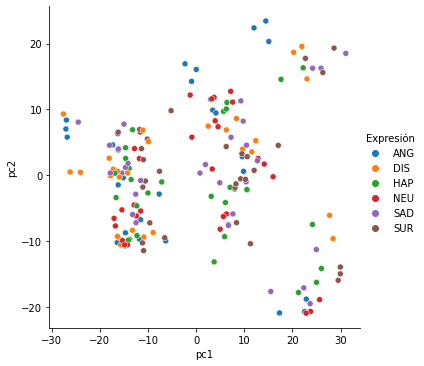

In [54]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='Expresión',data=G)

# Tomamos una representación con Kernel-PCA

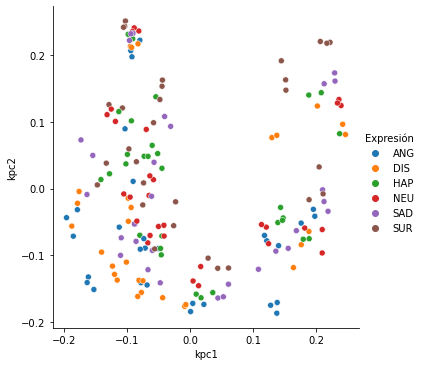

In [55]:
from sklearn.decomposition import KernelPCA # estandarizar y justificar
import seaborn as sns

sigma = 5.1 #0.8
ncomp = 180
kpca = KernelPCA(n_components=ncomp, kernel='cosine', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
# rbf - 
# sigmoid - 
# cosine - 0.1 dio buen resultado en redes 0.78 y 0.81 en maquinas de soporte vectorial
# linear 1.5
# poly 5.5 y 1.1 con maquinas de sopote vectorial
mesh_kpca = kpca.fit_transform(v/255) #X_sphere-estandar
comps = pd.DataFrame(mesh_kpca)
#comps

g = {'PC':range(0,180), 'kpc1':comps.iloc[:,0], 'kpc2':comps.iloc[:,1], 'Expresión':info.iloc[:,3], 'Persona':m}
G = pd.DataFrame(g)
#G
#fig.add_subplot(321)
sns.relplot(x='kpc1', y='kpc2', hue='Expresión',data=G)

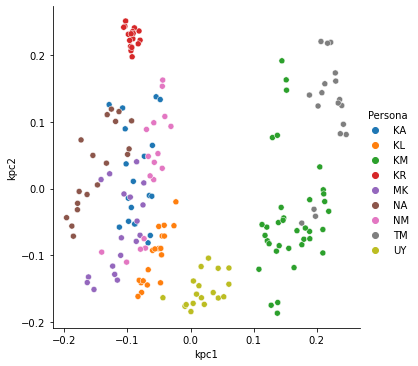

In [56]:
sns.relplot(x='kpc1', y='kpc2', hue='Persona',data=G)

In [57]:
datos_lim = pd.DataFrame(mesh_kpca)
datos_lim

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-0.103477,0.089757,0.085101,0.017506,-0.090583,0.062902,-0.003008,0.044997,0.080661,-0.024781,...,-0.000566,0.002166,0.000903,0.000183,-0.000104,-0.000447,0.000315,-0.000416,-0.001836,0.0
1,-0.112699,-0.057726,0.079120,0.069631,0.011152,-0.038696,-0.041940,0.073101,0.048139,0.142762,...,0.001416,-0.001132,0.000074,0.000493,-0.000479,0.001125,-0.000297,0.000134,0.000719,0.0
2,-0.090628,0.010961,0.064335,0.074859,-0.046513,-0.022658,-0.029196,0.109659,0.027438,0.138036,...,-0.000347,-0.000089,-0.000413,-0.000501,0.001391,0.000437,0.000338,0.000199,0.000145,0.0
3,-0.098562,-0.014278,0.107563,0.051723,-0.041037,-0.022565,-0.025331,0.124217,0.020826,0.134178,...,-0.000084,0.000534,-0.001183,-0.000408,0.001016,-0.000564,0.000270,-0.000993,0.000157,0.0
4,-0.093791,-0.028242,0.094179,0.074793,-0.020247,-0.018786,-0.027535,0.108453,0.018680,0.145697,...,-0.000267,0.000816,0.000997,0.000506,-0.001780,0.000222,0.000602,0.000608,0.000452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.212538,-0.019328,-0.040929,-0.093046,0.038721,-0.013468,-0.046059,0.075027,-0.049458,0.085773,...,-0.001317,0.000725,0.002847,-0.004509,0.000392,0.000315,0.002585,-0.000546,-0.000195,0.0
176,0.210234,-0.001729,-0.025064,-0.106907,0.039229,-0.014676,-0.035881,0.087631,-0.046221,0.072672,...,0.003724,0.000298,-0.000118,0.005143,0.000154,0.000933,-0.003360,-0.000013,-0.001040,0.0
177,0.188778,-0.016602,-0.027749,-0.075000,0.055662,-0.007741,-0.034932,0.119011,0.008465,0.075736,...,0.000490,0.001003,-0.001606,0.000291,-0.001585,0.000680,-0.001555,0.000549,-0.000393,0.0
178,0.210994,-0.007860,-0.049201,-0.118018,0.041099,0.004687,-0.025950,0.134752,-0.028098,0.069454,...,0.000124,-0.002173,0.001548,0.001365,0.000081,-0.001229,0.001109,-0.001312,-0.000810,0.0


In [58]:
from sklearn.model_selection import train_test_split
y = info.iloc[:,3]
X_train, X_test = train_test_split(datos_lim, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

Comenzamos a utilizar cada uno de los métodos de aprendizaje supervisado.

### Redes Neuronales

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ANG       0.60      1.00      0.75         3
         DIS       1.00      0.62      0.77         8
         HAP       0.67      0.67      0.67         3
         NEU       0.83      0.71      0.77         7
         SAD       0.67      0.67      0.67         6
         SUR       0.82      1.00      0.90         9

    accuracy                           0.78        36
   macro avg       0.76      0.78      0.75        36
weighted avg       0.81      0.78      0.77        36



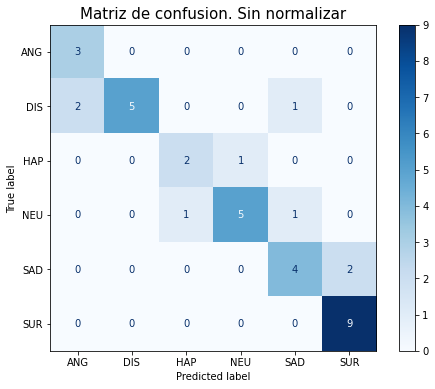

In [60]:
disp1 = metrics.plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### Maquinas de Soporte Vectorial

              precision    recall  f1-score   support

         ANG       0.60      1.00      0.75         3
         DIS       1.00      0.62      0.77         8
         HAP       0.60      1.00      0.75         3
         NEU       0.80      0.57      0.67         7
         SAD       0.67      0.67      0.67         6
         SUR       0.90      1.00      0.95         9

    accuracy                           0.78        36
   macro avg       0.76      0.81      0.76        36
weighted avg       0.81      0.78      0.77        36



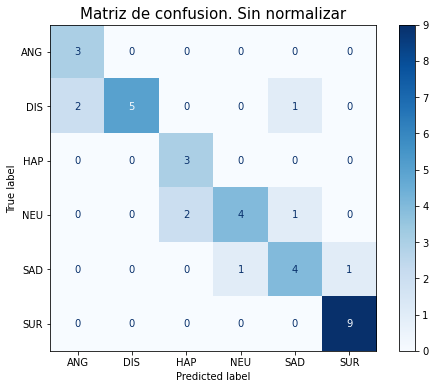

In [61]:
from sklearn.svm import SVC 
clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train, y_train)
y_pred_hat = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_hat))
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### Arboles de clasificación

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01) #0.001
alpha_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.306


### AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

y_hat = ada_clf.predict(X_test)
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ANG       0.18      0.67      0.29         3
         DIS       1.00      0.38      0.55         8
         HAP       0.60      1.00      0.75         3
         NEU       0.60      0.43      0.50         7
         SAD       0.62      0.83      0.71         6
         SUR       0.75      0.33      0.46         9

    accuracy                           0.53        36
   macro avg       0.63      0.61      0.54        36
weighted avg       0.70      0.53      0.54        36



### LDA

In [64]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.12      0.67      0.20         3
         DIS       0.00      0.00      0.00         8
         HAP       0.16      1.00      0.27         3
         NEU       0.00      0.00      0.00         7
         SAD       0.00      0.00      0.00         6
         SUR       0.00      0.00      0.00         9

    accuracy                           0.14        36
   macro avg       0.05      0.28      0.08        36
weighted avg       0.02      0.14      0.04        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### QDA

In [65]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_QDA))

              precision    recall  f1-score   support

         ANG       0.22      0.67      0.33         3
         DIS       0.50      0.38      0.43         8
         HAP       0.00      0.00      0.00         3
         NEU       0.50      0.29      0.36         7
         SAD       0.60      0.50      0.55         6
         SUR       0.67      0.22      0.33         9

    accuracy                           0.33        36
   macro avg       0.41      0.34      0.33        36
weighted avg       0.49      0.33      0.37        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
